# importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Data preprocessing

In [2]:
df = pd.read_csv('C:/Users/Hemant/jupyter_codes/ML Project 1/Loan status prediction/data.csv')

In [3]:
#to see the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#shape of the dataset
df.shape

(614, 13)

In [5]:
#to get some insights about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#to get the statistical measure of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#to check the sum of null values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#As the null values are less compared to data, we are dropping the null values
df = df.dropna()

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.shape

(480, 13)

Label Encoding

In [11]:
#convert categorical columns to numerical values
encoder = LabelEncoder()

objList = df.select_dtypes(include = "object").columns
print (objList)
objList = objList.drop('Loan_ID')

for string in objList:
    df[string] = encoder.fit_transform(df[string].astype(str))

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [13]:
df.shape

(480, 13)

In [14]:
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [15]:
#Replacing the 3+ with 4
df = df.replace(to_replace = '3+', value = 4)

In [16]:
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

# Data visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

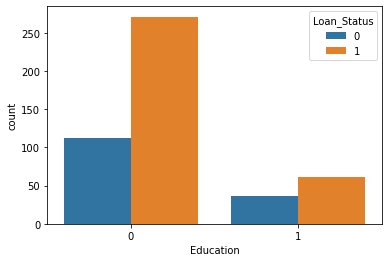

In [17]:
#education and loan status
sns.countplot(x = 'Education', hue = 'Loan_Status', data = df)

<AxesSubplot:xlabel='Married', ylabel='count'>

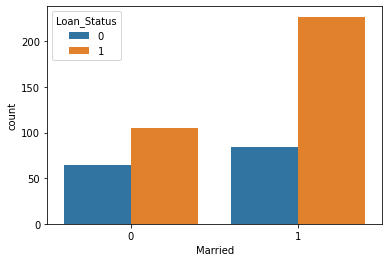

In [18]:
#martial status and loan status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

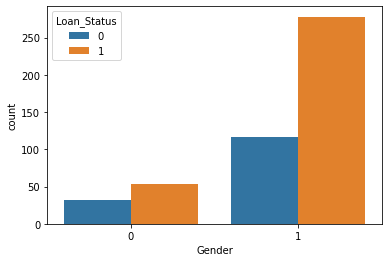

In [19]:
#gender and loan status
sns.countplot(x = 'Gender', hue = 'Loan_Status', data= df)

Separating data and labels

In [27]:
X = df.drop(columns = ['Loan_ID', 'Loan_Status'], axis =1)
Y = df['Loan_Status']

In [29]:
X.head()
Y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

Splitting the data into training data and testing data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, stratify = Y, random_state = 2)

Train the model :

Support Vector Machine Model

In [32]:
classifier = svm.SVC(kernel = 'linear')

In [33]:
#training the support vector model
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [34]:
#model evauation
#accuracy score on training data
prediction = classifier.predict(x_train)

accu_score = accuracy_score(prediction, y_train)
print('THE ACCURACY OF THE MODEL IS :', accu_score)

THE ACCURACY OF THE MODEL IS : 0.7942708333333334


In [37]:
#model evauation
#accuracy score on testing data
test_prediction = classifier.predict(x_test)

test_accu_score = accuracy_score(test_prediction, y_test)
print('THE ACCURACY OF THE MODEL IS :', test_accu_score)

THE ACCURACY OF THE MODEL IS : 0.8125


# predictive model system

In [39]:
'''
for this wrds type the corresponding int value

Female,No,Non-Graduate,Rural = 0
Male,Yes,Graduate,Semi-Urban = 1
Urban                        = 2
3+                           = 4

'''

input_data = input()
input_list = [float(i) for i in input_data.split(',')]
input_array = np.asarray(input_list)
reshaped_array = input_array.reshape(1, -1)

model_pred = classifier.predict(reshaped_array)
print('THE PREDICTED VALUE IS :' , model_pred)
if model_pred == 0:
    print('LOAN WILL NOT BE APPROVED')
else:
    print('LOAN WILL BE APPROVED')

1,1,4,1,0,3036,2504,158,360,0,1
THE PREDICTED VALUE IS : [0]
LOAN WILL NOT BE APPROVED
